In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

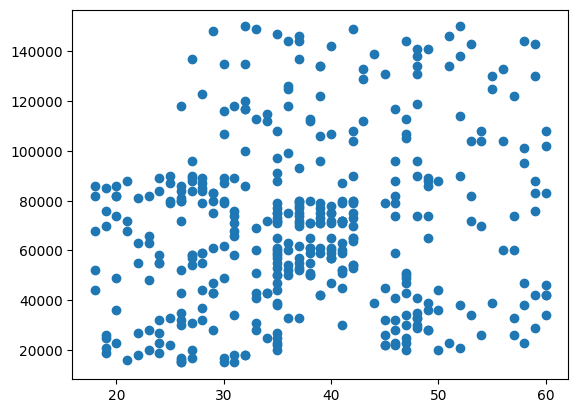

In [8]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [10]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [19]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [23]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=1)

Epoch 1/100
320/320 [==============================] - 1s 2ms/step - loss: 290.0717 - accuracy: 0.5469 - val_loss: 25.5403 - val_accuracy: 0.6000
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 268.7513 - accuracy: 0.5219 - val_loss: 136.9258 - val_accuracy: 0.6000
Epoch 3/100
320/320 [==============================] - 1s 2ms/step - loss: 203.0031 - accuracy: 0.5437 - val_loss: 447.0961 - val_accuracy: 0.4000
Epoch 4/100
320/320 [==============================] - 1s 2ms/step - loss: 286.1418 - accuracy: 0.5594 - val_loss: 59.6799 - val_accuracy: 0.4000
Epoch 5/100
320/320 [==============================] - 1s 2ms/step - loss: 196.8931 - accuracy: 0.5156 - val_loss: 3.1687 - val_accuracy: 0.6000
Epoch 6/100
320/320 [==============================] - 1s 2ms/step - loss: 190.7909 - accuracy: 0.5219 - val_loss: 126.6138 - val_accuracy: 0.4000
Epoch 7/100
320/320 [==============================] - 1s 2ms/step - loss: 159.2436 - accuracy: 0.5344 - val_loss: 523.126

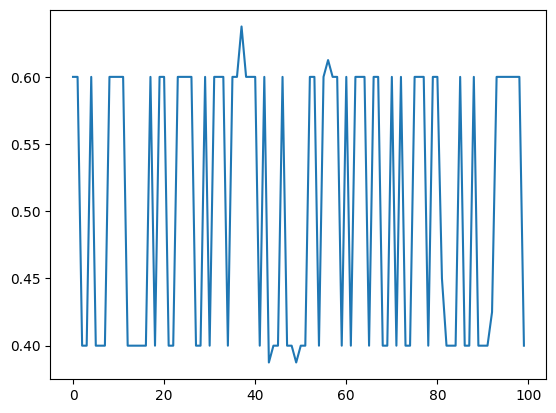

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [25]:
## Applying scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

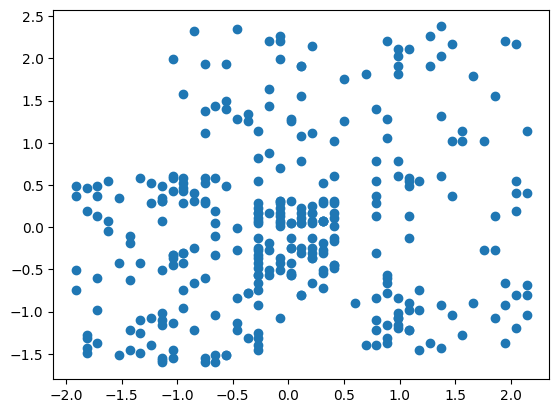

In [27]:
plt.scatter(x_train_scaled[:,0],x_train_scaled[:,1])

In [31]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 65ms/step - loss: 0.6824 - accuracy: 0.6375 - val_loss: 0.6508 - val_accuracy: 0.7750
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6240 - accuracy: 0.7781 - val_loss: 0.5925 - val_accuracy: 0.7750
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 0.5746 - accuracy: 0.8000 - val_loss: 0.5436 - val_accuracy: 0.8000
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.5331 - accuracy: 0.8219 - val_loss: 0.5035 - val_accuracy: 0.8000
Epoch 5/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4980 - accuracy: 0.8250 - val_loss: 0.4693 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 0.4670 - accuracy: 0.8250 - val_loss: 0.4404 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4407 - accuracy: 0.8313 - val_loss: 0.4154 - val_accuracy: 0.7875
Epoch 8

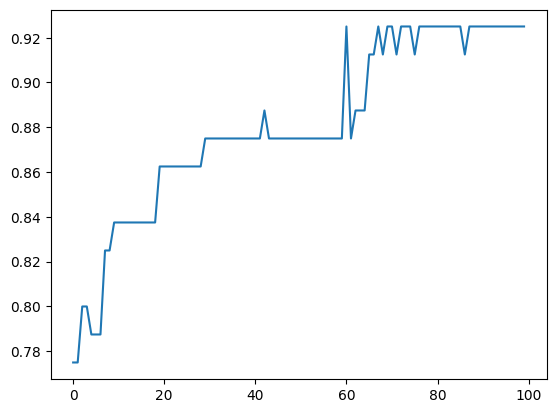

In [32]:
plt.plot(history.history['val_accuracy'])

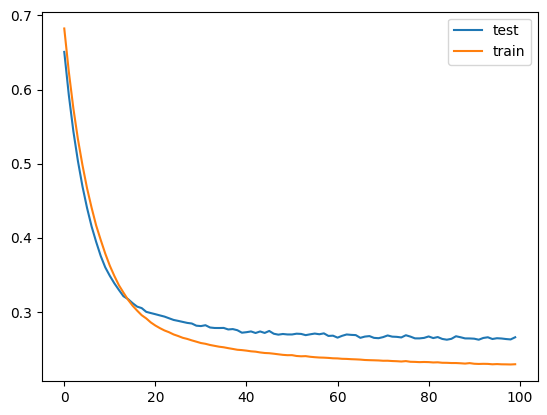

In [33]:
plt.plot(history.history['val_loss'],label='test')
plt.plot(history.history['loss'],label='train')
plt.legend()
plt.show()